In [15]:
import matplotlib  
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import talib

np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)
from funcat import *
from pytdx import *
from tushare import *
from rqalpha import *
#from jaqs import *
#from abupy import *
#from quantaxis import *
#from hikyuu import *
import time
import datetime
n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
#print (time.strftime("20%y-%m-%d")) ## dd/mm/yyyy格式，输出当日日期
#print (time.strftime("20%y%m%d"))
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前一天日期
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
print ("读取前一日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
n8="20170101"#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="20180201"#结束时间
print ("手动设定选股结束时间格式n9",n9)
n10="20170101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)
x1="000001.XSHG"
x2="603377.XSHG"
print ("设定股票代码",x1,x2)
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend

backend = "rqalpha"

if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())

set_start_date(n10)
S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期
print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线




读取当日时间格式n1 2018-02-03
读取当日时间格式n2 20180203
读取前一日时间格式n3 2018-02-02
读取当日时间格式n4 201823
读取当日时间格式n5 2018-02-03T14:27:42.796639
手动设定选股开始时间格式n8 20170101
手动设定选股结束时间格式n9 20180201
手动设定数据更新设定起始时间格式n10 20170101
设定股票代码 000001.XSHG 603377.XSHG
打印 开盘 最高 最低 收盘 成交量 3478.67 3495.09 3424.42 3446.98 26050470700.0
当天涨幅 -0.00972469209929816
打印60日均线 3380.6759999999977
判断收盘价是否大于60日均线 True
30日最高价 3587.03
最近30日，收盘价 Close 大于60日均线的天数 22
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 3563.64
5日均线上穿10日均线 False


No handles with labels found to put in legend.


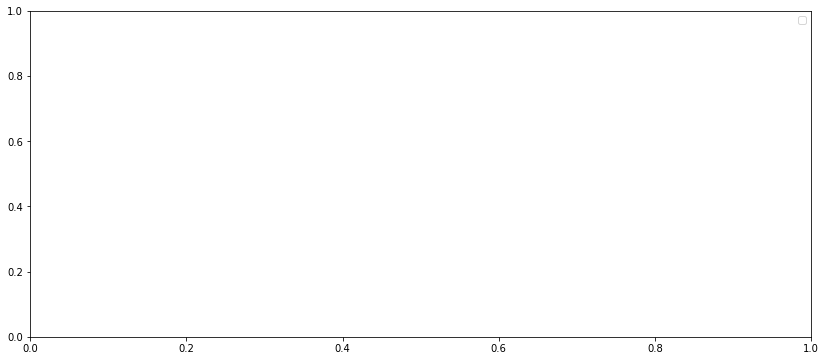

In [16]:
 #可以自己import我们平台支持的第三方python模块，比如pandas、numpy等。
#import numpy as np
#import pandas as pd
#from pandas import DataFrame,Series
#import talib

def CCI(M1=14):
	"""
	CCI 顺势指标
	"""
	TYP = (HIGH+LOW+CLOSE)/3
	CCI = (TYP-MA(TYP,M1))/(0.015*AVEDEV(TYP,M1))
	
	return CCI
	
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    
    return sum_/N
'''	
def AVEDEV(value,N):
	mean = value/N
	for i in range(1,N):
		mean += REF(value,i)/N
	AVE = ABS(value-mean)
	for i in range(1,N):
	    AVE += ABS(REF(value,i)-mean)
	
	return AVE/N
'''
# 在这个方法中编写任何的初始化逻辑。context对象将会在你的算法策略的任何方法之间做传递。
def init(context):
    reg_indicator('CCI', CCI, '1d', win_size=20)
    context.stock = '000001.XSHG'
    context.buy = 0

# before_trading此函数会在每天策略交易开始前被调用，当天只会被调用一次
def before_trading(context):
    pass

# 你选择的证券的数据更新将会触发此段逻辑，例如日或分钟历史数据切片或者是实时数据切片更新
def handle_bar(context, bar_dict):
    price = history_bars('000001.XSHG',20,'1d','close')
    cci = get_indicator("000001.XSHG",'CCI')
    if cci>-100 and REF(cci,1)<-100 and price[-1]>price[-2]:
        order_target_percent('000001.XSHG',1)
    elif cci<100 and REF(cci,1)>100 or price[-1]<price[-2]:
        order_target_percent('000001.XSHG',0)
    print(cci)
    plot('cci',cci.value)
    plot('100',100)
    plot('-100',-100)
# after_trading函数会在每天交易结束后被调用，当天只会被调用一次
def after_trading(context):
    pass
plt.legend()
plt.show()
print ()